In [33]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
import os

In [34]:
data_dir = "./data/"
data = []
for file in os.listdir(data_dir):
    data_raw = pd.read_excel(data_dir + file, skiprows=4)
    data_raw.columns = [column.lower().replace("\n", "").replace(" ", "_").replace("-", "_").strip() for column in
                        data_raw.columns]
    data.append(data_raw)

data = pd.concat(data)
print(data.columns)

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease_ment',
       'building_class_at_present', 'address', 'apartmentnumber', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'saleprice', 'sale_date'],
      dtype='object')


In [35]:
def get_district_by_borough(borough):
    if borough == 1:
        return "Manhattan"
    elif borough == 2:
        return "Bronx"
    elif borough == 3:
        return "Brooklyn"
    elif borough == 4:
        return "Queens"
    elif borough == 5:
        return "Staten Island"


data.insert(1, "district", [get_district_by_borough(a) for a in data.borough])
data

,borough,district,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,Bronx,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,...,2,0,2,2590,2450,1998,1,B9,505000,2013-05-15
6352,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,33 QUAIL LANE,...,2,0,2,2255,2377,1998,1,B9,0,2013-04-09
6353,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,40 HERRICK AVENUE,...,2,0,2,4000,2962,2000,1,B2,0,2012-08-01
6354,5,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,...,0,1,1,21663,6950,2008,4,K6,1300000,2013-05-29


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85975 entries, 0 to 6355
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         85975 non-null  int64         
 1   district                        85975 non-null  object        
 2   neighborhood                    85975 non-null  object        
 3   building_class_category         85975 non-null  object        
 4   tax_class_at_present            85975 non-null  object        
 5   block                           85975 non-null  int64         
 6   lot                             85975 non-null  int64         
 7   ease_ment                       85975 non-null  object        
 8   building_class_at_present       85975 non-null  object        
 9   address                         85975 non-null  object        
 10  apartmentnumber                 85975 non-null  object        
 11  zip

In [37]:
houses_on_sale = data[(data.total_units > 0) & (data.land_square_feet > 0)]
houses_on_sale['quantile'] = pd.qcut(houses_on_sale['saleprice'], 10, labels=False, duplicates='drop')
houses_on_sale = houses_on_sale[(houses_on_sale['quantile'] > 0) & (houses_on_sale['quantile'] < 10)].drop(
    columns="quantile")
houses_on_sale['year_quarter'] = houses_on_sale.sale_date.apply(lambda x: f"{x.year}-{x.quarter}")
houses_on_sale

C:\Users\misha\AppData\Local\Temp\ipykernel_21632\1856586712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_on_sale['quantile'] = pd.qcut(houses_on_sale['saleprice'], 10, labels=False, duplicates='drop')


,borough,district,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date,year_quarter
0,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,...,0,1,1842,2048,1901,1,A5,355000,2013-07-08,2013-3
1,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,...,0,1,1103,1290,1910,1,A1,474819,2013-05-20,2013-2
2,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,...,0,1,1986,1344,1899,1,A1,210000,2013-03-12,2013-1
3,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,...,0,1,2329,1431,1901,1,A1,343116,2013-07-01,2013-3
5,2,Bronx,BATHGATE,02 TWO FAMILY HOMES,1,2912,158,,B1,505 EAST 171ST STREET,...,0,2,2000,2400,1993,1,B1,316500,2012-12-27,2012-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,7317,82,,B2,110 SHARROTTS ROAD,...,0,2,5610,1670,1994,1,B2,560000,2013-04-18,2013-2
6349,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,7317,124,,B2,83 ROBIN COURT,...,0,2,7525,2160,1994,1,B2,520000,2013-06-18,2013-2
6351,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,...,0,2,2590,2450,1998,1,B9,505000,2013-05-15,2013-2
6354,5,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,...,1,1,21663,6950,2008,4,K6,1300000,2013-05-29,2013-2


In [38]:
houses_on_sale['price_per_lsf'] = houses_on_sale.saleprice / houses_on_sale.land_square_feet
houses_on_sale

,borough,district,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date,year_quarter,price_per_lsf
0,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,...,1,1842,2048,1901,1,A5,355000,2013-07-08,2013-3,192.725299
1,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,...,1,1103,1290,1910,1,A1,474819,2013-05-20,2013-2,430.479601
2,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,...,1,1986,1344,1899,1,A1,210000,2013-03-12,2013-1,105.740181
3,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,2329,1431,1901,1,A1,343116,2013-07-01,2013-3,147.323315
5,2,Bronx,BATHGATE,02 TWO FAMILY HOMES,1,2912,158,,B1,505 EAST 171ST STREET,...,2,2000,2400,1993,1,B1,316500,2012-12-27,2012-4,158.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,7317,82,,B2,110 SHARROTTS ROAD,...,2,5610,1670,1994,1,B2,560000,2013-04-18,2013-2,99.821747
6349,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,7317,124,,B2,83 ROBIN COURT,...,2,7525,2160,1994,1,B2,520000,2013-06-18,2013-2,69.102990
6351,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,...,2,2590,2450,1998,1,B9,505000,2013-05-15,2013-2,194.980695
6354,5,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,...,1,21663,6950,2008,4,K6,1300000,2013-05-29,2013-2,60.010156


In [39]:
houses_for_plot = houses_on_sale.drop(
    columns=["sale_date", "address", "zip_code", "block", "lot", "ease_ment", "building_class_at_present",
             "residential_units", "commercial_units", "total_units", "year_built"])
houses_for_plot

,borough,district,neighborhood,building_class_category,tax_class_at_present,apartmentnumber,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,year_quarter,price_per_lsf
0,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,,1842,2048,1,A5,355000,2013-3,192.725299
1,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,,1103,1290,1,A1,474819,2013-2,430.479601
2,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,,1986,1344,1,A1,210000,2013-1,105.740181
3,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,,2329,1431,1,A1,343116,2013-3,147.323315
5,2,Bronx,BATHGATE,02 TWO FAMILY HOMES,1,,2000,2400,1,B1,316500,2012-4,158.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,,5610,1670,1,B2,560000,2013-2,99.821747
6349,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,,7525,2160,1,B2,520000,2013-2,69.102990
6351,5,Staten Island,WOODROW,02 TWO FAMILY HOMES,1,,2590,2450,1,B9,505000,2013-2,194.980695
6354,5,Staten Island,WOODROW,22 STORE BUILDINGS,4,,21663,6950,4,K6,1300000,2013-2,60.010156


In [41]:
houses_by_year = houses_for_plot.groupby(["year_quarter"]).mean()
houses_by_year

,borough,land_square_feet,gross_square_feet,saleprice,price_per_lsf
year_quarter,,,,,
2012-3,3.385439,4017.789384,8310.827124,1.269311e+06,630.985097
2012-4,3.179438,6483.200790,14012.401579,2.245069e+06,488.957560
2013-1,3.316471,4182.163137,11135.032907,1.290128e+06,313.961102
2013-2,3.377959,4790.296095,8290.570330,1.544683e+06,371.009507
2013-3,3.166070,4405.762757,13745.799463,1.498073e+06,371.487912


<AxesSubplot:xlabel='year_quarter'>

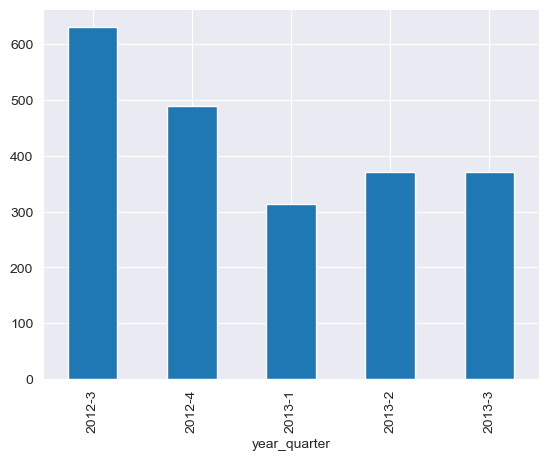

In [42]:
houses_by_year.price_per_lsf.plot(kind="bar")

In [44]:
houses_by_borough = houses_for_plot.groupby(['district', 'year_quarter'], as_index=False).mean()
display(houses_by_borough)
fig = plt.figure()
ax = fig.add_subplot(111)

,district,year_quarter,borough,land_square_feet,gross_square_feet,saleprice,price_per_lsf
0,Bronx,2012-3,2.0,5437.560440,7479.840659,9.977298e+05,168.720658
1,Bronx,2012-4,2.0,17945.727132,15258.694574,1.417980e+06,180.623187
2,Bronx,2013-1,2.0,3997.203422,5862.039924,6.298678e+05,169.752996
3,Bronx,2013-2,2.0,13560.223473,9283.528939,9.304216e+05,187.052718
4,Bronx,2013-3,2.0,4803.573991,8994.488789,1.145668e+06,192.172023
5,Brooklyn,2012-3,3.0,3031.502283,4361.619482,9.364888e+05,1256.417535
6,Brooklyn,2012-4,3.0,4161.014547,6110.899578,1.209212e+06,366.124509
7,Brooklyn,2013-1,3.0,3361.232787,3941.918033,8.713212e+05,298.139228
8,Brooklyn,2013-2,3.0,2789.536153,4010.380173,9.825486e+05,353.560225
9,Brooklyn,2013-3,3.0,2970.167785,3616.053691,1.074457e+06,406.401121


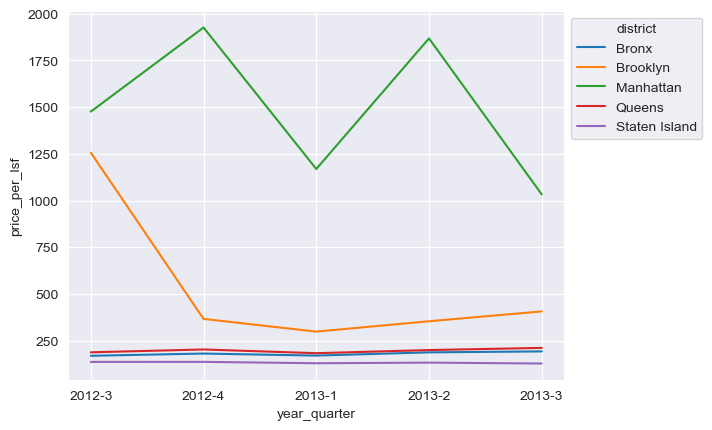

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = seaborn.lineplot(data=houses_by_borough, x=houses_by_borough.year_quarter, y=houses_by_borough.price_per_lsf,
                      hue=houses_by_borough.district)
seaborn.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
houses_by_borough = houses_for_plot.groupby(['neighborhood', 'year_quarter'], as_index=False).mean()
display(houses_by_borough)
fig = plt.figure()
ax = fig.add_subplot(111)